In [1]:
#pip install pandas openpyxl 
#!pip install wordcloud
#!pip install wordcloud matplotlib
#!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import re
import unicodedata
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

**Import datasets**

`Woman` 

In [3]:
# Woman
df1 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman.csv')
df2 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman1.csv')
df3 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman2.csv')
df4 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman3.csv')
df5 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman4.csv')
df6 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman5.csv')
df7 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman6.csv')

In [4]:
# Merge woman datasets
df_woman = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

Add “profile” column to indicate whether the profile is female or male.

In [5]:
df_woman['profile'] = 'woman'

In [6]:
df_woman.shape

(2050, 18)

In [7]:
df_woman.drop_duplicates(inplace=True)

In [8]:
df_woman.shape

(2050, 18)

`Man` 

In [9]:
# Man
df8 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man.csv')
df9 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man2.csv')
df10 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man3.csv')
df11 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man4.csv')
df12 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man5.csv')
df13 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man6.csv')
df14 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man7.csv')
df15 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man8.csv')

In [10]:
# Merge man datasets
df_man = pd.concat([df8, df9, df10, df11, df12, df13, df14, df15], ignore_index=True)

Add “profile” column to indicate whether the profile is female or male.

In [11]:
df_man['profile'] = 'man'

In [12]:
df_man.shape

(2171, 18)

In [13]:
df_man.drop_duplicates(inplace=True)

In [14]:
df_man.shape

(2050, 18)

`Merged both datasets`

In [15]:
df = pd.concat([df_woman, df_man], ignore_index=True)

In [16]:
df.head()

,name,age,location,story_about,job,education,heightv2,intentionsv2,exercisev2,educationv2,drinkingv2,smokingv2,familyPlansv2,religionv2,Politicsv2,genderv2,starSignv2,profile
0,Tarek,26,"Sant Cugat del Vallès, Barcelona",NaN,NaN,NaN,175 cm,Something casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woman
1,Guillem,41,Barcelona,Philosophy and film studies.\n\nFrom electroni...,Film Editor And Teacher,UAB-UB-EDC,184 cm,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Atheist,Left,NaN,NaN,woman
2,Bernardo,31,Barcelona,NaN,NaN,NaN,180 cm,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Atheist,Left,Man,NaN,woman
3,Leonardo,28,Barcelona,Looking for company to explore the World,Electrical Engineer,UFSC,174 cm,NaN,Sometimes,Undergraduate degree,Socially,Never,Not sure yet,NaN,Apolitical,Man,Aquarius,woman
4,Ahmed,31,Barcelona,NaN,NaN,NaN,186 cm,Relationship,Sometimes,Graduate degree,Socially,Socially,Not sure yet,NaN,Apolitical,Man,Scorpio,woman


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4099 non-null   object
 1   age            4100 non-null   int64 
 2   location       4075 non-null   object
 3   story_about    2918 non-null   object
 4   job            1611 non-null   object
 5   education      1023 non-null   object
 6   heightv2       3982 non-null   object
 7   intentionsv2   3864 non-null   object
 8   exercisev2     3831 non-null   object
 9   educationv2    3600 non-null   object
 10  drinkingv2     3927 non-null   object
 11  smokingv2      3780 non-null   object
 12  familyPlansv2  3188 non-null   object
 13  religionv2     2617 non-null   object
 14  Politicsv2     2028 non-null   object
 15  genderv2       3956 non-null   object
 16  starSignv2     3741 non-null   object
 17  profile        4100 non-null   object
dtypes: int64(1), object(17)
memo

Change columns names

In [18]:
df.shape

(4100, 18)

In [19]:
new_column_names = {
    'story_about' : 'about_me',
    'heightv2': 'height',
    'intentionsv2': 'intentions',
    'exercisev2': 'exercise',
    'educationv2': 'educationTag',
    'drinkingv2': 'drinking',
    'smokingv2': 'smoking',
    'familyPlansv2': 'childrens',
    'religionv2': 'religion',
    'Politicsv2': 'politics',
    'genderv2': 'gender',
    'starSignv2': 'zodiacSign',
}

df.rename(columns=new_column_names, inplace=True)

Remove "cm" in column height so is a int number

In [20]:
df['height'] = df['height'].str.replace(' cm', '')

Remove "Barcelona" in column location so I only take the town

In [21]:
df['location'] = df['location'].str.split(',').str[0]

Looking for duplicate column (taking into account that the profile of the column “profile” makes them different so I have to filter not taking into account this column)

In [22]:
df.shape

(4100, 18)

In [23]:
# Exclude the 'profile' column and determine duplicate rows
duplicated_rows_mask = df.drop(columns=['profile']).duplicated(keep=False)

# Get duplicate rows
duplicated_rows = df[duplicated_rows_mask]

In [24]:
# I add the duplicate rows to the old dataset and indicate that these rows should have the category in the “profile” column changed by both
df.loc[duplicated_rows_mask, 'profile'] = 'both'

In [25]:
#Delete duplicate rows
df.drop_duplicates(inplace=True)

In [26]:
df["profile"].value_counts()

profile
woman    2042
man      2042
both        8
Name: count, dtype: int64

Use regex to make the job column more available

In [27]:
# Apply unidecode to each DataFrame element to remove accents.
df = df.applymap(lambda x: ''.join([c for c in unicodedata.normalize('NFKD', x) if not unicodedata.combining(c)]) if isinstance(x, str) else x)

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_17468/3211241325.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: ''.join([c for c in unicodedata.normalize('NFKD', x) if not unicodedata.combining(c)]) if isinstance(x, str) else x)


In [28]:
df["job"].count()

1607

In [29]:
#General view of the activities
unicos = df["job"].unique()
for i in unicos:
    print(i)
len(unicos)

nan
Film Editor And Teacher
Electrical Engineer
model
Enginyer informatic
Consultant at Recruitment
Program Manager in IT & Podcaster
Ceo
Account manager
Startup Founder
Padagoge fur Kinder at Kindergarten
Empresario
Comunicacio
Higienista Bucodental
Growth Director
Compositor musical at free worker
Pizzaiolo at Alma Mia
La Vida
Medico
Business Manager at Tecnologia
Ingeniero de Software
Professor
Software Engineer at Moving Picture Company
Infectious Diseases Medical Doctor
General partner at Encomenda Venture Capital
Sales team leader Catalunya at TheFork
Software Engineer
Project Manager at IT
Realtor at Berkshire Hathaway Home Services Golden Properties
Tecnic Electric
Sales at Finland
High school teacher
Chef at Aquamarina Hotel
Country Manager at Tech SaaS
Tecnico en Anatomia Patologica
escritor at zaino
Beca en investigacion at Instituto de Investigacion en IA
Global Marketing Director
Marketing at Aura Empresas
Director at Inteligencia Artificial
buisness-owner
Engineer
Associa

1297

In [30]:
dict_job = {
    #r"[Pp]iloto|[Pp]iloto": "pilot",
    r"[Ff]arma|[Pp]harmaci|[Pp]harma": "pharmacisty",
    r"[Aa]ctor|[Mm]odel|[Aa]ctriz": "actor/actress",
    r"[Cc]reative|[Cc]reativo|[Aa]rte": "creative director",
    r"[Dd]esign|[Dd]iseñad|[Dd]ecorateur|[Dd]isenadora|[Ii]nterioris|[Dd]iseno": "design",
    r"[Cc]eo": "ceo",
    r"[Ff]uncionar|[Pp]oli": "civil servant",
    r"[Aa]rchitect|[Aa]rquitec|[Aa]rchitektin": "architect",
    r"[Aa]dministr": "administrator",
    r"[Mm]echanical|[Mm]ecanica": "mechanical engineer",
    r"[Dd]entist|[Oo]dontol|[Bb]ucal|[Dd]ental|[Hh]igienista": "dentist",
    #r"[Rr]eal state|[Ii]nmobi": "real state",
    r"[Ff]isioterapeuta|[Pp]hysiotherapist": "physiotherapist",
    r"[Cc]onsult": "consultant",
    r"[Ll]ogistic": "logistics",
    #r"[Tt]elecommunications|[Tt]elecomuni": "telecommunications",
    r"[Ee]dition|3[Dd],[Mm]otion,[Cc]olorist|2[Dd]": "editor",
    r"[Ww]eb|[Dd]evelo": "web developer",
    r"[Cc]ontable|[Bb]ank": "accountant",
    r"[Ff]ilm|[Aa]udiovisual|[Aa]v|[Ss]creenwriter|[Cc]ineasta|[Dd]ocumentalista|[Gg]uionista|[Aa]tv": "film industry",
    r"[Ss]oftware|[Pp]rogramador|[Pp]rogramm": "software engineer",
    r"[Aa]cco": "account manager",
    r"[Mm]usic|[Cc]omposit|[Dd]j|[Ss]inger": "music industry",
    r"[Rr]ecruitment|[Hh]R|[Rr]RHH|[Hh]uman|[Rr]Recursos": "recruitment or consultant",
    r"[Ss]ales|[Ss]eller|[Vv]entas": "sales",
    r"[Pp]roject": "project manager",
    r"[Tt]eacher|[Pp]rofessor|[Pp]edagogo|[Pp]rofe|[Mm]aestro|[Ee]ducador|[Ee]ntrenador|[Mm]estra": "teacher",
    r"[Ww]riter|[Ee]scritor": "writer",
    r"[Ff]ounder|[Ff]undador|[Oo]wner|[Pp]ropietario": "founder/owner",
    r"[Dd]octor|[Mm]edico|[Ss]anidad|[m]etge|[Ii]nfermer|[Ee]nfermero|[Nn]urse|[Pp]ediatra": "doctor or nurse",
    r"[Cc]omunic|[Cc]ommuni|[Ll]ocutor|[Cc]omms|[Pp]eriodista|[Jj]ournalist": "communication",
    r"[Cc]hef|[Cc]ocinero|[Cc]uiner": "chef",
    r"[Ee]ntrepreneur|[Ee]mpresario|[Bb]uisness|[Bb]usiness|[Ee]mprended": "entrepreneur",
    r"[Mm]arketing|[Cc]ontent|[Cc]opywriter|[Aa]dvert|[Pp]ublici|[Ss]ocial Media|[Dd]igital|[Bb]randing|[Cc]ommunity Management": "marketing",
    r"[Qq]imic|[Qq]uimi|[Cc]hemical": "chemical",
    r"[Ff]inanc|[Ee]conomista": "financial",
    r"[Aa]bogad|[Ll]awyer|[Aa]dvocat": "lawyer",
    #r"[Aa]arqueologo|[Aa]rchaeologist": "archaeologist",
    r"[Tt]ech": "tech",
    r"[Aa]nalyst|[Aa]nalista|[Dd]ata": "data analyst/scientist",
    r"[Ss]tudent|[Es]tudiante|[Pp]hD": "student",
    r"[Cc]onstruction|[Cc]onstruc|[Oo]bra": "construction",
    r"[Ff]otogra|[Pp]hotogra": "photographer",
    r"[Pp]sicolog|[Pp]hotogra|[Tt]herapist|[Tt]erapeu": "psychologist",
    r"[Aa]artifi": "AI",
    r"[Aa]dministra": "administrative",
    r"[Oo]rganizador|[Ee]vents|[Pp]R|[Pp]ublic Relations|[Rr]elacionista|[Ee]spectaculos|[Pp]r&comms": "events or PR",
    r"[Rr]esearch|[Rr]esearcher" : "research"}


In [31]:
# Function to categorize species
def categorize_activities(text, dict_job):
    if isinstance(text, str):  # Check if the value is a text string
        for pattern, category in dict_job.items():
            if re.search(pattern, text):
                return category
    return "Other"  # If it does not match any category, "Other" is returned.

In [32]:
# Clear invalid values in the "job" column
df["job"] = df["job"].fillna("empty")  # Fill NaN values with an empty string
df["job"] = df["job"].astype(str)  # Convert all values to text strings

In [33]:
# Apply the function to categorize activities
df["job"] = df["job"].apply(lambda x: categorize_activities(x, dict_job))

In [34]:
df["job"].value_counts()

job
Other                        3081
design                         73
teacher                        73
marketing                      60
software engineer              47
entrepreneur                   45
consultant                     44
student                        37
web developer                  37
doctor or nurse                36
data analyst/scientist         35
lawyer                         34
tech                           34
communication                  32
film industry                  31
project manager                30
architect                      26
sales                          25
music industry                 25
founder/owner                  24
chef                           22
account manager                22
creative director              21
pharmacisty                    18
psychologist                   17
administrator                  16
financial                      16
research                       16
photographer                   15
recruitmen

Visualization of more repitet words in about_me colums

In [35]:
# Download the nltk stop words set if you don't already have it
nltk.download('stopwords')

# Define stop words in English and Spanish
stop_words_english = set(stopwords.words('english'))
stop_words_spanish = set(stopwords.words('spanish'))
stop_words = stop_words_english.union(stop_words_spanish)

# Definir palabras específicas a eliminar
specific_words_to_remove = {"persona","buena","buscando","looking","good", "busca","da", "cosa", "ser","know","dont","siempre","solo","amb","tambien","hola","gente","amb","im", "lets", "aqui", "si", "per", "mas", "people","soc","bien"}  
stop_words.update(specific_words_to_remove)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roraimachavez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Step 1: Remove NaN values and 'NaN' strings
df.dropna(subset=['about_me'], inplace=True)
df = df[df['about_me'].str.lower() != 'nan']

# Step 2: Convert all values to text strings
df['about_me'] = df['about_me'].astype(str)

# Step 3: Remove spaces at the beginning and end of each string, convert to lowercase and replace
df['about_me'] = df['about_me'].str.strip().str.lower().str.replace('\n', ' ')

# Step 4: Removing punctuation marks
df['about_me'] = df['about_me'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [37]:
# Function to remove stop words from a text
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [38]:
# Step 5: Apply the function to remove stop words
df['about_me'] = df['about_me'].apply(remove_stop_words)

In [39]:
# Function to generate a word cloud
def generate_word_cloud(data, title):
    text = " ".join(review for review in data)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    #plt.savefig("word_cloud.png")
    plt.show()

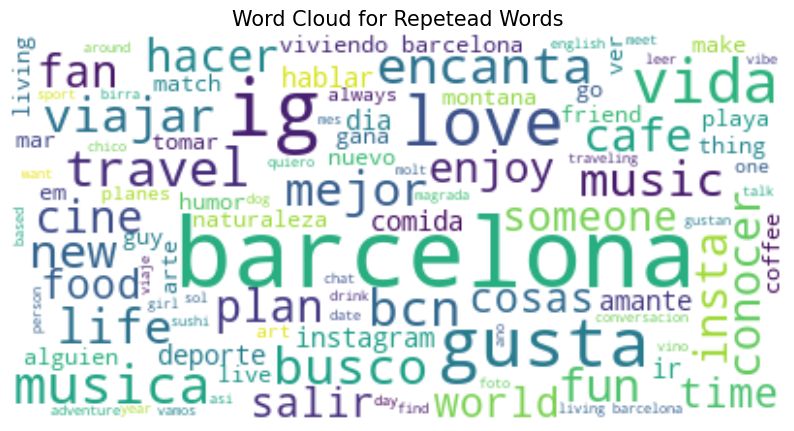

In [40]:
# Generate word clouds for the most repeated words. 
about_me = df.about_me

generate_word_cloud(about_me, "Word Cloud for Repetead Words")

In [41]:
#df.to_csv('bumble.csv', index=False)

In [42]:
df.head()

,name,age,location,about_me,job,education,height,intentions,exercise,educationTag,drinking,smoking,childrens,religion,politics,gender,zodiacSign,profile
1,Guillem,41,Barcelona,philosophy film studies electronic classical i...,film industry,UAB-UB-EDC,184,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Atheist,Left,NaN,NaN,woman
3,Leonardo,28,Barcelona,company explore world,Other,UFSC,174,NaN,Sometimes,Undergraduate degree,Socially,Never,Not sure yet,NaN,Apolitical,Man,Aquarius,woman
5,Kema,24,Granollers,speak spanish english,Other,NaN,183,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Other,Apolitical,Man,Scorpio,woman
6,Mat,46,Barcelona,hi everyone say italian live barcelona work mo...,actor/actress,NaN,185,Don’t know yet,Sometimes,NaN,Socially,Never,Want someday,Christian,Apolitical,Man,Taurus,woman
7,Xavier S-T,24,Barcelona,catala che enamorat fer birres sopar els amics...,Other,UPC 2023,184,Don’t know yet,Active,Graduate degree,Socially,Never,Want someday,Atheist,Left,Man,Aries,woman


# To import en SQL

In [44]:
def deleteCharacter (texto):
    # Reemplaza los guiones por espacios
    texto = texto.replace('-', ' ')
    # Reemplaza cualquier carácter que no sea una letra, número o espacio por una cadena vacía
    texto = re.sub(r'[^A-Za-z0-9\s]+', '', texto)
    return texto
    
# Aplicar la función a todas las columnas del DataFrame
df_ok = df.applymap(lambda x: deleteCharacter(str(x)) if isinstance(x, str) else x)
df_ok

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_17468/514715780.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ok = df.applymap(lambda x: deleteCharacter(str(x)) if isinstance(x, str) else x)


,name,age,location,about_me,job,education,height,intentions,exercise,educationTag,drinking,smoking,childrens,religion,politics,gender,zodiacSign,profile
1,Guillem,41,Barcelona,philosophy film studies electronic classical i...,film industry,UAB UB EDC,184,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Atheist,Left,NaN,NaN,woman
3,Leonardo,28,Barcelona,company explore world,Other,UFSC,174,NaN,Sometimes,Undergraduate degree,Socially,Never,Not sure yet,NaN,Apolitical,Man,Aquarius,woman
5,Kema,24,Granollers,speak spanish english,Other,NaN,183,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Other,Apolitical,Man,Scorpio,woman
6,Mat,46,Barcelona,hi everyone say italian live barcelona work mo...,actoractress,NaN,185,Dont know yet,Sometimes,NaN,Socially,Never,Want someday,Christian,Apolitical,Man,Taurus,woman
7,Xavier S T,24,Barcelona,catala che enamorat fer birres sopar els amics...,Other,UPC 2023,184,Dont know yet,Active,Graduate degree,Socially,Never,Want someday,Atheist,Left,Man,Aries,woman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,Blas,23,Barcelona,argentino recien llegado barcelona abierto con...,Other,NaN,172,NaN,Sometimes,NaN,Socially,Socially,NaN,Spiritual,NaN,Man,Virgo,man
4095,Emilie,23,Barcelona,hey love coffee beer grab together mathaemolina,Other,NaN,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman,Virgo,man
4096,Luana,32,Barcelona,luanadelazzari best country living best city,Other,NaN,174,NaN,Sometimes,NaN,Socially,Never,NaN,NaN,NaN,Woman,Taurus,man
4098,Giuliana,28,Barcelona,,Other,NaN,NaN,Dont know yet,Active,In grad school,Socially,Never,NaN,NaN,NaN,Woman,Capricorn,man


In [45]:
df_ok.to_csv('bumble_ok.csv', index=False)